# Рубежный контроль №1

Выполнила: Повираева Марина Леонидовна, группа ИУ5-24М

Описание задания: 

### Вариант №3
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака.

In [1]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import files
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
os.listdir()
data = pd.read_csv('drive/My Drive/Files/dataset/BlackFriday.csv', sep=",")

# Масштабирование данных

Возьмем параметр покупок:

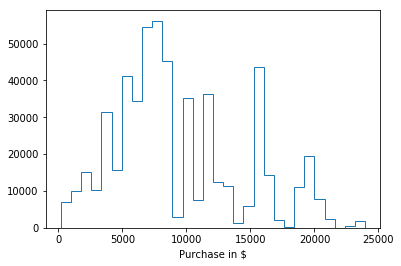

In [3]:
plt.hist(data['Purchase'], 30, histtype='step')
plt.xlabel('Purchase in $')
plt.show()

Масштабируем данные по методу минимакса и Z-оценок:

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


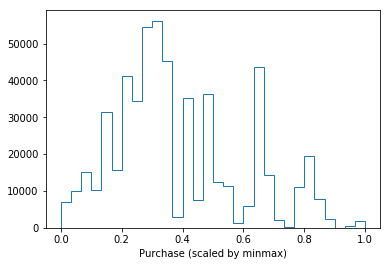

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Purchase']])

plt.hist(sc1_data, 30, histtype='step')
plt.xlabel('Purchase (scaled by minmax)')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


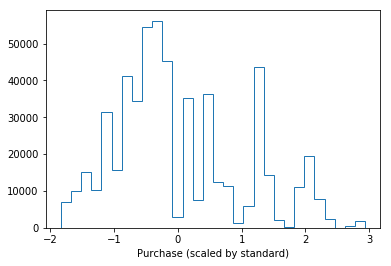

In [5]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Purchase']])

plt.hist(sc2_data, 30, histtype='step')
plt.xlabel('Purchase (scaled by standard)')
plt.show()

Логичнее использовать масштабирование minmax, так как параметр имеет значения почти от 0 до большого значения (и поэтому логичнее маштабировать от 0 до 1). 

# Преобразование категориальных признаков

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Использование LabelEncoder

In [7]:
cat_temp_data = data[['Gender']]
cat_temp_data[0:10]

,Gender
0,F
1,F
2,F
3,F
4,M
5,M
6,M
7,M
8,M
9,M


Сравним исходные данные и их целочисленные значения:

In [8]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_temp_data['Gender'])
cat_enc2 = pd.DataFrame({'Gender':cat_temp_data['Gender'], 'Gender bin':cat_enc_le})
cat_enc2[0:10]

,Gender,Gender bin
0,F,0
1,F,0
2,F,0
3,F,0
4,M,1
5,M,1
6,M,1
7,M,1
8,M,1
9,M,1


Внедрим данные в исходные данные:

In [9]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
data2 = data
data2['Gender'] = cat_enc_le
data2.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


## Использование OneHotEncoder

In [11]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['City_Category']])
cat_enc_ohe.todense()[0:10]

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])

In [12]:
data4 = pd.get_dummies(data[['City_Category']])
data4.head(5)

,City_Category_A,City_Category_B,City_Category_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


Добавим в исходные данные новые столбцы:

In [13]:
data3=data2.join(data4)
data3.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370,1,0,0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200,1,0,0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422,1,0,0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057,1,0,0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969,0,0,1
